# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     | Sofia Anaya  |
| **Fecha**      | 28 Ene 2026  |
| **Expediente** | 738594  |

## Regresión polinomial

Observa la siguiente gráfica.

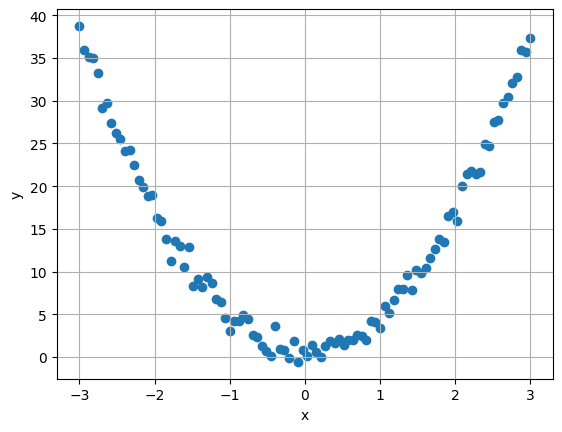

In [5]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [3]:
from sklearn.linear_model import LinearRegression

In [10]:
#para poder hacer la matriz para abajo
X=x.reshape(-1,1)
#para poder sacar la regresión lineal
model_linear = LinearRegression()
model_linear.fit(X, y)
print(f"Intercept (beta_0): {model_linear.intercept_:.4f}")
print(f"Coefficient (beta_1): {model_linear.coef_[0]:.4f}")

Intercept (beta_0): 13.3022
Coefficient (beta_1): -0.0496


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

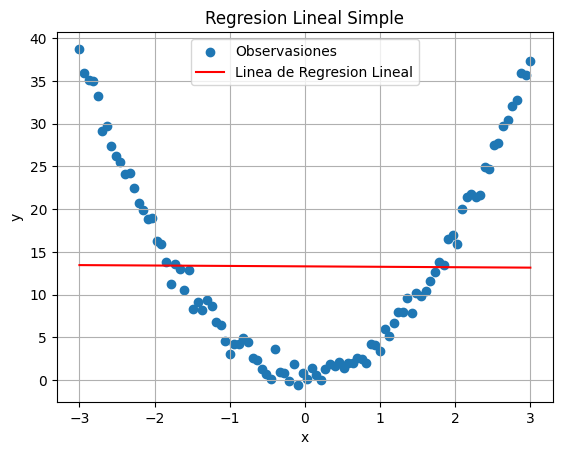

In [11]:
plt.figure()
plt.scatter(x, y, label='Observasiones')
plt.plot(x, model_linear.predict(X), color='red', label='Linea de Regresion Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion Lineal Simple')
plt.legend()
plt.grid()

In [8]:
r_cuadrada_lineal = model_linear.score(X, y)
print(f"R-cuadrada para regresión lineal: {r_cuadrada_lineal:.2f}")

R-cuadrada para regresión lineal: 0.00


Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
#hace un modelo que primero transforma los datos polinomialmente y luego aplica una regresión lineal
from sklearn.pipeline import make_pipeline

In [16]:
# modela relaciones no lineales con un enfoque lineal
poly_reg_2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg_2.fit(X, y)
r_squared_quadratic = poly_reg_2.score(X, y)
print(f"R-squared for quadratic regression: {r_squared_quadratic:.2f}")

R-squared for quadratic regression: 0.99


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

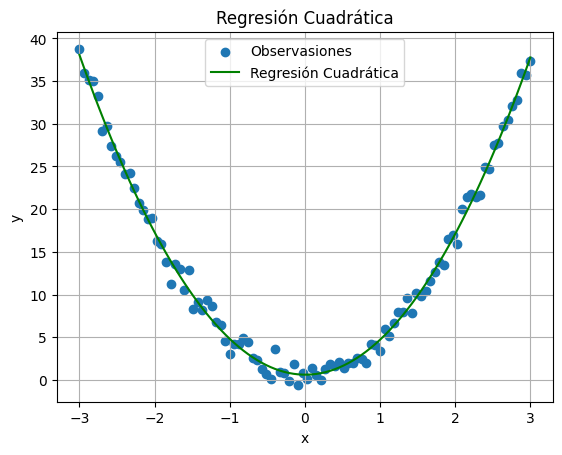

In [17]:
plt.figure()
plt.scatter(x, y, label='Observasiones')
plt.plot(x, poly_reg_2.predict(X), color='green', label='Regresión Cuadrática')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Cuadrática')
plt.legend()
plt.grid()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [30]:
x1 = X
x2 = X**2
x3 = X**3
x4 = X**4
x5 = X**5
x6 = X**6
x7 = X**7
x8 = X**8
x9 = X**9
x10 = X**10
x11 = X**11

X3 = np.hstack([x1, x2, x3])
lr = LinearRegression()
lr.fit(X3, y)
lr.intercept_
r_cuadrado3 = lr.score(X3, y)
print(f"Intercepto (beta_0) para grado 3: {lr.intercept_:.4f}")
print(f"R-cuadrado3: {r_cuadrado3:.4f}")

Intercepto (beta_0) para grado 3: 0.6194
R-cuadrado3: 0.9934


In [31]:
X5 = np.hstack([x1, x2, x3, x4, x5])
lr = LinearRegression()
lr.fit(X5, y)
lr.intercept_
r_cuadrado5 = lr.score(X5, y)
print(f"Intercepto (beta_0) para grado 5: {lr.intercept_:.4f}")
print(f"R-cuadrado5: {r_cuadrado5:.4f}")

Intercepto (beta_0) para grado 5: 0.6337
R-cuadrado5: 0.9935


In [32]:
X7 = np.hstack([x1, x2, x3, x4, x5, x6, x7])
lr = LinearRegression()
lr.fit(X7, y)
lr.intercept_
r_cuadrado7 = lr.score(X7, y)
print(f"Intercepto (beta_0) para grado 7: {lr.intercept_:.4f}")
print(f"R-cuadrado7: {r_cuadrado3:.4f}")


Intercepto (beta_0) para grado 7: 0.6102
R-cuadrado7: 0.9934


In [34]:
X9 = np.hstack([x1, x2, x3, x4, x5, x6, x7, x8, x9])
lr = LinearRegression()
lr.fit(X9, y)
lr.intercept_
r_cuadrado9 = lr.score(X9, y)
print(f"Intercepto (beta_0) para grado 9: {lr.intercept_:.4f}")
print(f"R-cuadrado9: {r_cuadrado9:.4f}")


Intercepto (beta_0) para grado 9: 0.5890
R-cuadrado9: 0.9935


In [35]:
X11 = np.hstack([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11])
lr = LinearRegression()
lr.fit(X11, y)
lr.intercept_
r_cuadrado11 = lr.score(X11, y)
print(f"Intercepto (beta_0) para grado 11: {lr.intercept_:.4f}")
print(f"R-cuadrado3: {r_cuadrado11:.4f}")

Intercepto (beta_0) para grado 11: 0.5671
R-cuadrado3: 0.9935


Crea una gráfica por cada modelo con las observaciones y su curva.





In [1]:
poly_models = {}
r_squared_values = {}


In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_models = {}
r_squared_values = {}

degrees = [3, 5, 7, 9, 11]

for degree in degrees:
    current_X_poly = X
    for i in range(2, degree + 1):
        current_X_poly = np.hstack((current_X_poly, X**i))

    model = LinearRegression()
    model.fit(current_X_poly, y)

    poly_models[degree] = model
    r_squared_values[degree] = model.score(current_X_poly, y)

    print(f"Modelo de grado {degree} entrenado. R-cuadrada: {r_squared_values[degree]:.4f}")

if 'poly_reg_2' in locals():
    poly_models[2] = poly_reg_2
    r_squared_values[2] = poly_reg_2.score(X, y)
    print(f"Modelo de grado 2 R-cuadrada: {r_squared_values[2]:.4f}")
else:
    poly_reg_2_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    poly_reg_2_model.fit(X, y)
    poly_models[2] = poly_reg_2_model
    r_squared_values[2] = poly_reg_2_model.score(X, y)
    print(f"Modelo de grado 2. R-cuadrada: {r_squared_values[2]:.4f}")

Modelo de grado 3 entrenado. R-cuadrada: 0.9934
Modelo de grado 5 entrenado. R-cuadrada: 0.9935
Modelo de grado 7 entrenado. R-cuadrada: 0.9935
Modelo de grado 9 entrenado. R-cuadrada: 0.9935
Modelo de grado 11 entrenado. R-cuadrada: 0.9935
Modelo de grado 2 (cuadrático) también almacenado. R-cuadrada: 0.9934


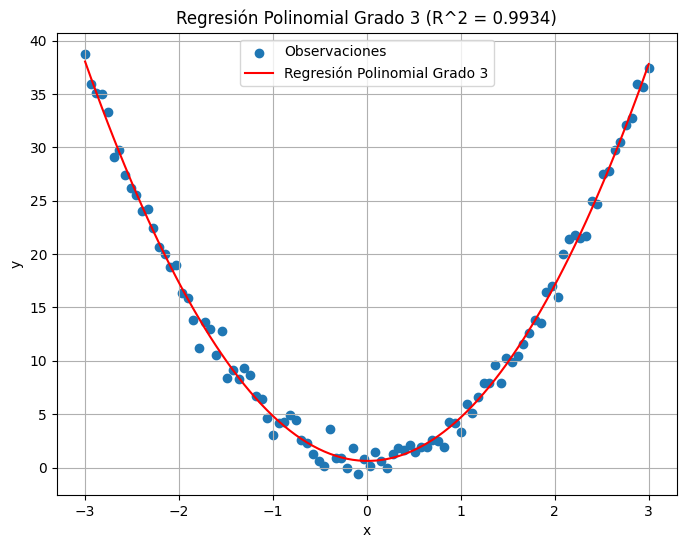

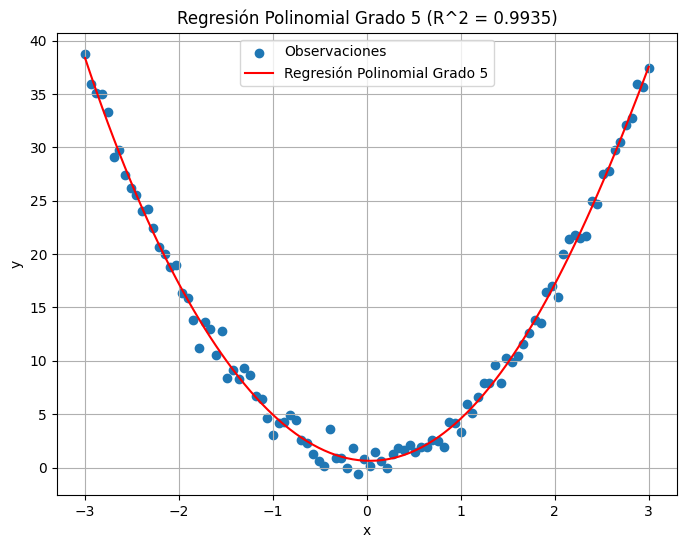

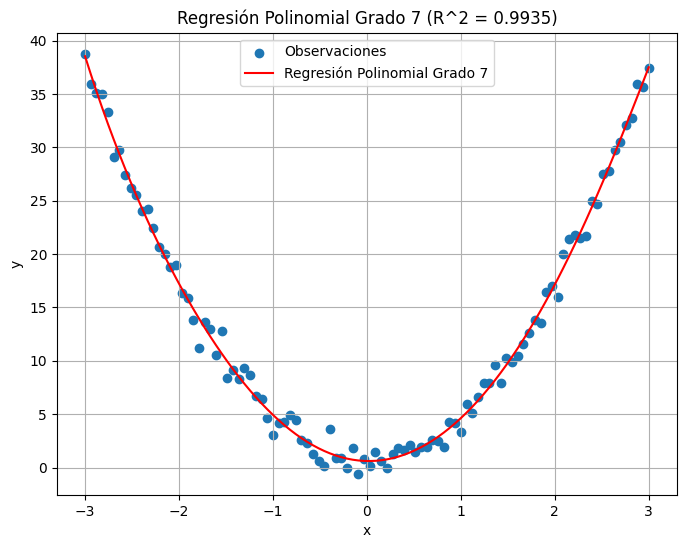

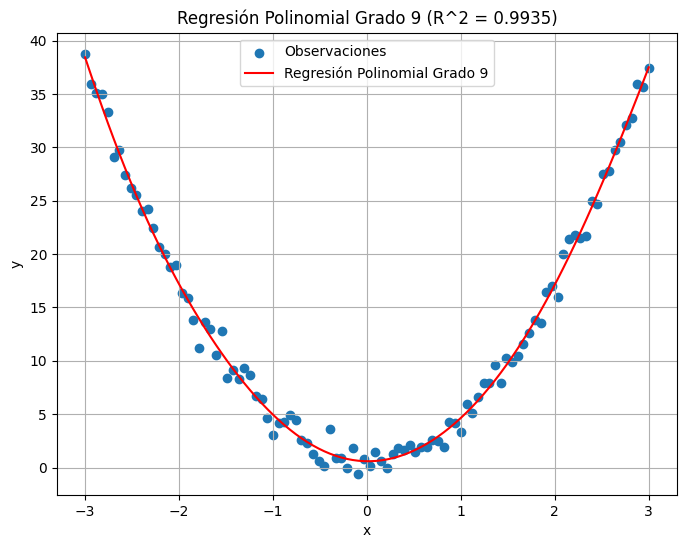

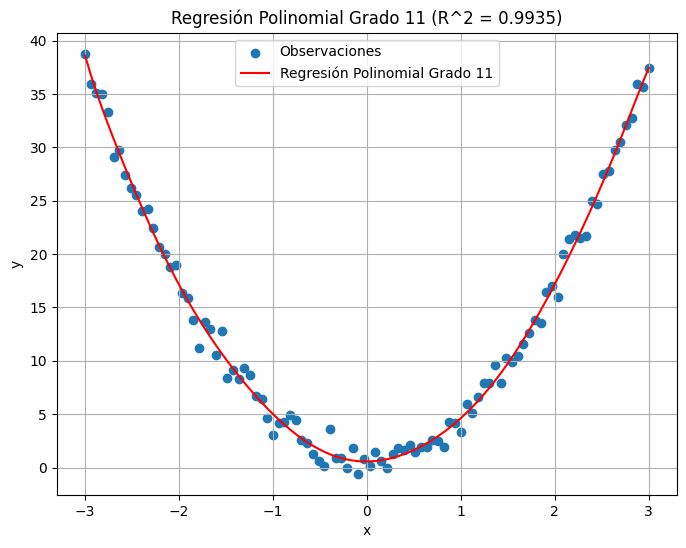

In [60]:
degrees = [3, 5, 7, 9, 11]

for degree in degrees:
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label='Observaciones')

    X_poly_current_degree = X
    for i in range(2, degree + 1):
        X_poly_current_degree = np.hstack((X_poly_current_degree, X**i))

    y_pred = poly_models[degree].predict(X_poly_current_degree)

    plt.plot(x, y_pred, color='red', label=f'Regresión Polinomial Grado {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Regresión Polinomial Grado {degree} (R^2 = {r_squared_values[degree]:.4f})')
    plt.legend()
    plt.grid(True)
    plt.show()


**¿Cuál modelo consideras que es mejor? ¿Por qué?**

Deespués de ver los modelos polinómicos, se puede ver que todos presentan un R-cuadrada muy alto y casi igual(alrededor de 0.9934-0.9935), los modelos de menor grado (en sí el 3) son mejor elección. Al aumentar la complejidad sugiere sobreajuste en los grados superiores, que capturan más el ruido en lugar de la tendencia real, reduciendo su capacidad de generalización. Por tanto,yo considero que el modelo de grado 3 por que es casi lo mismo, solo sin menos ruido de los demás datos.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [55]:
x_sola= np.array([[5]])

# Predict for quadratic model (this model is a pipeline and handles feature transformation internally)
y_cuad = poly_models[2].predict(x_sola)
print(f"Predicted y for x=5 (Quadratic Model): {y_cuad[0]:.2f}")

# Predecir para otros modelos
for degree in degrees:
    # Se transforma la x sola a polinomeal
    x_polin = x_sola
    for i in range(2, degree + 1):
        x_polin = np.hstack((x_polin, x_sola**i))

    y_cuad= poly_models[degree].predict(x_polin)
    print(f"Predicción y para x=5 (Polynomial Degree {degree}): {y_cuad[0]:.2f}")

Predicted y for x=5 (Quadratic Model): 103.97
Predicción y para x=5 (Polynomial Degree 3): 104.25
Predicción y para x=5 (Polynomial Degree 5): 84.60
Predicción y para x=5 (Polynomial Degree 7): 33.74
Predicción y para x=5 (Polynomial Degree 9): 215.74
Predicción y para x=5 (Polynomial Degree 11): -5265.34


## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3